<a href="https://colab.research.google.com/github/poojashreeNS/K-Means-scratch/blob/main/K_mean_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing required modules
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
#Load Data
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()
pca = PCA(2)

***Data Processing***

In [4]:
#converting categorical to numeric
data.Gender = pd.Categorical(data.Gender).codes
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
# Normalizing the data.
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.021775,0.021775,0.413728,0.326628,0.849232
1,0.023518,0.011759,0.246939,0.176385,0.952480
2,0.113308,0.000000,0.755390,0.604312,0.226617
3,0.048759,0.000000,0.280363,0.195035,0.938606
4,0.093250,0.000000,0.578153,0.317052,0.746004


***K-Means function Implementation***

In [2]:
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :]
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
     
    #Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

***Clustering using K-Means***

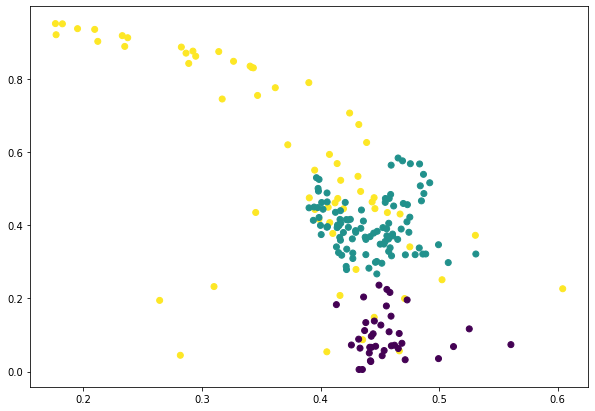

In [6]:
#Transform the data
df = pca.fit_transform(data_scaled)
#Applying Kmeans function
label = kmeans(df,3,1000)
#Plot
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=label, cmap='viridis') 

***Clustering using Agglomerative clustering***

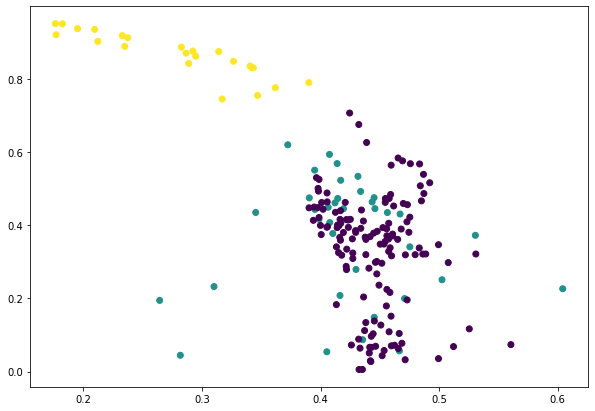

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Applying Agglomerative Clustering function
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# Fitting data to the model
cluster.fit_predict(data_scaled)
#Plotting result
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_) 

***Clustering using Gaussian Mixture***

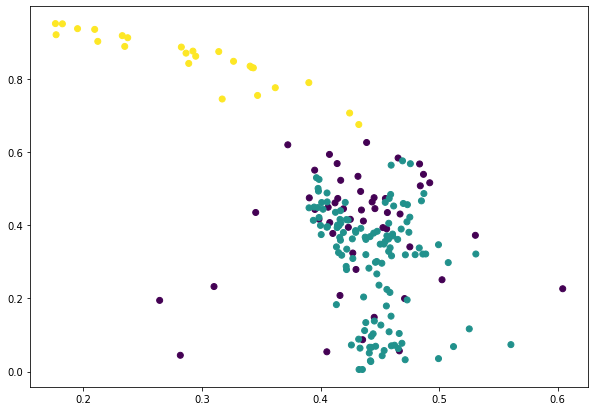

In [7]:
from sklearn import mixture
#Applying Gaussian Mixture function
model = mixture.GaussianMixture(n_components=3).fit(data_scaled)
#fitting data to the model
labels = model.fit_predict(data_scaled)
#plot
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=labels) 

***Clustering using DBSCAN***

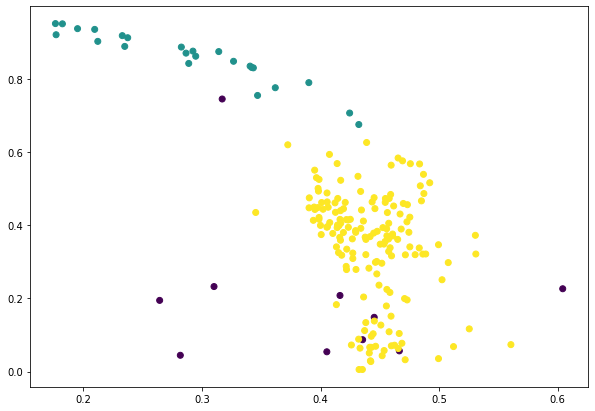

In [ ]:
from sklearn.cluster import DBSCAN
#Applying DBSCAN function and fitting the data
db = DBSCAN(eps=0.2, min_samples=10).fit(data_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#Plotting
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=labels, cmap='viridis')